# 多任务进程

### 多任务
- 是指在同一时间内执行**多个任务**
- 多任务的执行方式
    - 并发
    - 并行
    - 任务数大于cpu的核数表示并发的去执行多任务
    - 任务数小于等于cpu的核数表示并行的去执行多任务
- 只有多核cpu才能真正意义上让多个软件一起运行

### 进程
- 进程是实现多任务的一种方式
- 概念
    - 一个正在运行的程序或者软件就是一个进程，**他是操作系统进行资源分配的基本单位**，也就是说每启动一个进程，操作系统都会给其分配一定的运行资源（内存资源）保证进程的运行
    - 注意：一个程序运行后至少有一个进程，一个进程默认有一个线程，进程里面可以创建多个线程，线程是依附在进程里面的，没有进程就没有线程
- 进程的作用
    - 默认程序运行创建一个进程
    - 多进程可以完成多任务，每个进程就好比一家独立的公司，每个公司都各自在运营，每个进程也各自在运行，执行各自的任务
    

### 多进程使用
- 1. 导入进程包
    - import multiprocessing
- Process进程类的说明
    - Process([group[,target[,name[,args[,kwargs]]]]])
        - group：指定进程组，目前只能使用None
        - target：执行的目标任务名
        - name：进程名字
        - args：以元组方式给执行任务传参
        - kwargs：以字典方式给执行任务传参
    - Process创建的实例对象的常用方法
        - start()：启动子进程实例（创建子进程）
        - join():等待子进程执行结束
        - terminate()：不管任务是否完成，立即终止子进程
    - Process创建的实例对象的常用属性
        - name：当前进程的别名，默认为Process-N，N为从1开始递增的整数
- 小结
    - 导入进程包
        - import multiprocessing
    - 创建子进程并指定执行的任务
        - sub_process = multiprocessing.Process (target=任务名)
    - 启动进程执行任务
        - sub_process.start()

In [8]:
# 1. 导入进程包
import multiprocessing
import time


# 跳舞任务
def dance():
    for i in range(3):
        print("跳舞中...")
        time.sleep(1)
        
        
# 唱歌任务
def sing():
    for i in range(3):
        print("唱歌中...")
        time.sleep(1)
        
        
# 2. 创建子进程(自己手动创建的进程成为子进程，在__init__.py文件中已经导入的Process类)
# 1. group：进程组，目前只能使用None，一般不需要设置
# 2. target：进程执行的目标任务
# 3. name：进程名，如果不设置，默认是Process-1.....
dance_process = multiprocessing.Process(target=dance) # 这里dance不要加()，加上表示调用
# sing_process = multiprocessing.Process(target=sing)


if __name__ == "__main__":
    # 3. 启动进程执行对应的任务
    dance_process.start()
    # sing_process.start()


    # 主进程
    # 主进程执行唱歌任务
    sing()

    # 多进程程序在jupyter没运行成功
    # 在pycharm中运行，需要加if __name__ == "__main__":才能运行

### 获取进程编号
- 目的
    - 验证主进程和子进程的关系，可以得知子进程是由哪个主进程创建出来的
    - 获取进程编号的两种操作
        - 获取当前进程编号
            - os.getpid()表示获取当前进程编号
        - 获取当前父进程编号
            - os.getppid()便是获取当前父进程编号

In [6]:
# 1. 导入进程包
import multiprocessing
import time
import os


# 跳舞任务
def dance():
    # 获取当前进程（子进程）的编号
    dance_process_id = os.getpid()
    # 获取当前进程对象，查看当前代码是由哪个进程执行的:multiprocessing.current_process()
    print("dance_process_id:", dance_process_id, multiprocessing.current_process())
    # 获取当前进程的父进程编号
    dance_process_parent_id = os.getppid()
    print("dance_process的父进程编号是：", dance_process_parent_id)
    
    for i in range(3):
        print("跳舞中...")
        time.sleep(1)
        # 扩展：根据进程编号强制杀死指定进程(9表示强杀)
        os.kill(dance_process_id, 9)
        
        
# 唱歌任务
def sing():
    # 获取当前进程（子进程）的编号
    sing_process_id = os.getpid()
    # 获取当前进程对象，查看当前代码是由哪个进程执行的:multiprocessing.current_process()
    print("sing_process_id:", sing_process_id, multiprocessing.current_process())

    # 获取当前进程的父进程编号
    sing_process_parent_id = os.getppid()
    print("sing_process的父进程编号是：", sing_process_parent_id)
    
    for i in range(3):
        print("唱歌中...")
        time.sleep(1)
        
        
# 获取当前进程（主进程）的编号
main_process_id = os.getpid()
# 获取当前进程对象，查看当前代码是由哪个进程执行的:multiprocessing.current_process()
print("main_process_id:", main_process_id, multiprocessing.current_process())

        
# 2. 创建子进程(自己手动创建的进程成为子进程，在__init__.py文件中已经导入的Process类)
# 1. group：进程组，目前只能使用None，一般不需要设置
# 2. target：进程执行的目标任务
# 3. name：进程名，如果不设置，默认是Process-1.....
dance_process = multiprocessing.Process(target=dance, name = "dance_process") # 这里dance不要加()，加上表示调用
print("dance_process:", dance_process)
sing_process = multiprocessing.Process(target=sing, name = "sing_process")
print("sing_process:", sing_process)


if __name__ == "__main__":
    # 3. 启动进程执行对应的任务

    dance_process.start()
    sing_process.start()


    # 主进程
    # 主进程执行唱歌任务
    # sing()

main_process_id: 1308 <_MainProcess name='MainProcess' parent=None started>
dance_process: <Process name='dance_process' parent=1308 initial>
sing_process: <Process name='sing_process' parent=1308 initial>


### 进程执行带有参数的任务
- Process类执行任务并给任务传参数有两种方式
    - args表示以元组的方式给执行任务传参
        - 元组方式传参一定要和参数的顺序保持一致
    - kwargs表示以字典的方式给执行任务传参
        - 字典方式传参字典中的key一定要和参数名保持一致

In [5]:
import multiprocessing


# 显示信息的任务
def showInfo(name, age):
    print(name , age)
    

if __name__ == "__main__":
    # 创建子进程
    # 以元组方式传参，元组里面的元素顺序要和函数的参数顺序保持一致
    sub_process = multiprocessing.Process(target=showInfo, args=("李四", 20))
    # 启动进程
    sub_process.start()

    # 以字典方式传参，字典里面的key要和函数里面的参数名保持一致，没有顺序要求
    sub_process = multiprocessing.Process(target=showInfo, kwargs={"age": 20, "name": "王五"})
    # 启动进程
    sub_process.start()

    # 一个参数用args,一个用kwargs
    sub_process = multiprocessing.Process(target=showInfo,args=("冯七",), kwargs={"age": 20})
    # 启动进程
    sub_process.start()

### 进程的注意点
- 进程之间不共享全局变量
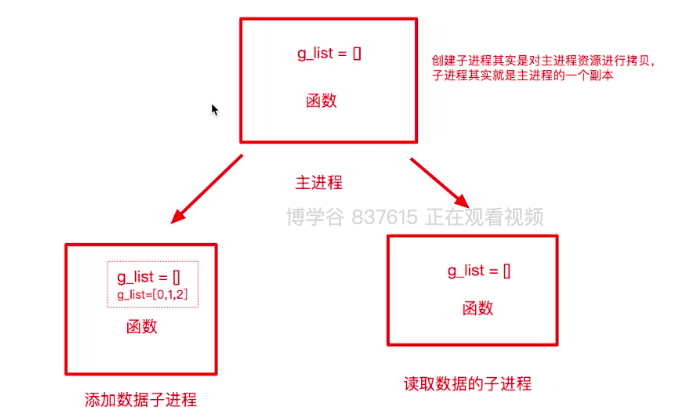
- 主进程会等待所有的子进程执行结束再结束
- 为了保证子进程能够正常的运行，主进程会等所有的子进程执行完成以后再销毁，设置守护主进程的目的是主进程退出子进程销毁，不让主进程再等待子进程去执行。
- 设置守护主进程方式： 子进程对象.daemon = True
- 销毁子进程方式： 子进程对象.terminate()

In [1]:
import multiprocessing
import time


# 定义全局变量
g_list = list()


# 添加数据的任务
def add_data():
    for i in range(3):
        # 因为列表是可变类型，可以在原有内存的基础上修改数据，并且修改后内存地址不变
        # 所以不需要加上 global 关键字
        # 加上 global 表示声明要修改全局变量的内存地址
        g_list.append(i)
        print("add:", i)
        time.sleep(0.2)
        
    print("添加完成:", g_list)
    
    
# 读取数据的任务
def read_data():
    print("read:", g_list)
    
    
# 提示：对应 Linux 和 Mac 主进程执行的代码不会进行拷贝，单对于windows系统来说主进程执行的代码也会进行拷贝执行
# 对于windows来说创建子进程的代码如果进行拷贝执行相当于递归无限制进行创建子进程，会报错

# 理解说明：直接执行的模块就是主模块，那么直接执行的模块里面就应该添加判断是否是主模块的代码

# 1. 防止别人导入文件的时候执行 main 里面的代码
# 2. 防止 windows系统递归创建子进程

if __name__ == "__main__":
    # 添加数据的子进程
    add_process = multiprocessing.Process(target=add_data)
    # 读取数据的子进程
    read_process = multiprocessing.Process(target=read_data)

    # 启动进程执行对于的任务
    add_process.start()
    # 当前进程（主进程）等待添加数据的进程执行完成后代码再继续往下执行
    add_process.join()
    print("main:", g_list)
    read_process.start()
    
    # 结论：进程之间不共享全局变量

main: []


In [11]:
import multiprocessing
import time


def task():
    for i in range(10):
        print("任务执行中...")
        time.sleep(0.2)
        
        
# 判断是否是直接执行的模块，程序入口模块

# 编制 python 写法，直接执行的模块，需要加水判断是否是主模块的代码
if __name__ == "__main__":
    
    # 创建子进程
    sub_process = multiprocessing.Process(target=task)
    sub_process.start()
    
    # 主进程延时0.5秒钟
    time.sleep(0.5)
    print("Over")
    
    
# 结论：主进程会等待子进程执行完成以后程序再退出

Over


In [12]:
# 当子进程进入无线循环，主进程无法等到子进程退出，解决办法：主进程退出子进程销毁
# 1. 让子进程设置成为守护主进程，主进程退出子进程销毁，子进程会依赖主进程
import multiprocessing
import time


def task():
    while True:
        print("任务执行中...")
        time.sleep(0.2)
        
        
# 判断是否是直接执行的模块，程序入口模块

# 编制 python 写法，直接执行的模块，需要加水判断是否是主模块的代码
if __name__ == "__main__":
    
    # 创建子进程
    sub_process = multiprocessing.Process(target=task)
    # 把子进程设置成为守护主进程，以后主进程退出子进程直接销毁
    sub_process.daemon = True
    sub_process.start()
    
    # 主进程延时0.5秒钟
    time.sleep(0.5)
    print("Over")

Over


In [14]:
# 2. 让主进程退出之前先让子进程销毁
import multiprocessing
import time


def task():
    while True:
        print("任务执行中...")
        time.sleep(0.2)
        
        
# 判断是否是直接执行的模块，程序入口模块

# 编制 python 写法，直接执行的模块，需要加水判断是否是主模块的代码
if __name__ == "__main__":
    
    # 创建子进程
    sub_process = multiprocessing.Process(target=task)
    sub_process.start()
    
    # 主进程延时0.5秒钟
    time.sleep(0.5)
    # 退出主进程以前，先让子进程进行销毁
    sub_process.terminate()
    print("Over")

Over
